In [9]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from copy import deepcopy


def f(x, functype: str):
    if functype == "poly-1":  # 1st order polynomial
        return x+1
    elif functype == "poly-2":  # 2nd order polynomial
        return x**2/2+x+1
    elif functype == "poly-3":  # 3rd order polynomial
        return x**3/6+x**2/2+x+1
    elif functype == "poly-4":  # 4th order polynomial
        return x**4/24+x**3/6+x**2/2+x+1
    elif functype == "sin":  # sin function
        return np.sin(2*x)
    elif functype == "exp-sin":  # mixed function
        return np.exp(x)*np.sin(x)


# calculate the analytical derivation of f(x)


def df(x, functype: str):
    if functype == "poly-1":
        return np.ones_like(x)
    elif functype == "poly-2":
        return x+1
    elif functype == "poly-3":
        return x**2/2+x+1
    elif functype == "poly-4":
        return x**3/6+x**2/2+x+1
    elif functype == "sin":
        return 2*np.cos(2*x)
    elif functype == "exp-sin":
        return np.exp(x)*(np.sin(x)+np.cos(x))


# calculate the analytical 2nd derivation of f(x)


def ddf(x, functype: str):
    if functype == "poly-1":
        return np.zeros_like(x)
    elif functype == "poly-2":
        return np.ones_like(x)
    elif functype == "poly-3":
        return x+1
    elif functype == "poly-4":
        return x**2/2+x+1
    elif functype == "sin":
        return -4*np.sin(2*x)
    elif functype == "exp-sin":
        return 2*np.exp(x)*np.cos(x)


# four kinds of numerical differential methods


def diff(f, x, h, order: int, precision: int):
    assert (order == 1 or order == 2) and (precision == 1 or precision == 2)
    if order == 1 and precision == 1:
        return (f(x+h) - f(x)) / h
    elif order == 1 and precision == 2:
        return (f(x+h)-f(x-h))/(2*h)
    elif order == 2 and precision == 1:
        return (f(x+2*h) - 2*f(x+h) + f(x)) / h**2
    elif order == 2 and precision == 2:
        return (- f(x+3*h) + 4*f(x+2*h) - 5*f(x+h) + 2*f(x)) / h**2


# number of cases
max_iter = 16

# use a dictionary to store the result.
result = {}

# test all the cases
for functype in ["poly-1", "poly-2", "poly-3", "poly-4", "sin", "exp-sin"]:
    for order in [1, 2]:
        for precision in [1, 2]:
            for datatype in ["single", "double"]:
                error_list = np.zeros(max_iter)
                for grid_num in range(max_iter):
                    n = int(2**(grid_num+3))
                    h = 1/n

                    x = np.linspace(0, 1, n+12)
                    if datatype == "single":
                        x = x.astype(np.float32)
                    numerical_diff = diff(
                        partial(f, functype=functype), x, h, order=order, precision=precision)
                    analytical_diff = df(
                        x, functype) if order == 1 else ddf(x, functype)
                    error = np.mean(np.abs(numerical_diff-analytical_diff))
                    # use the l-1 norm to evaluate the error
                    error_list[grid_num] = error

                index = (functype, order, precision, datatype)
                result[index] = deepcopy(error_list)
for x in result:
    print(x)
    print(result[x])

('poly-1', 1, 1, 'single')
[0.00000000e+00 6.81195971e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.17828485e-07
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
('poly-1', 1, 1, 'double')
[8.88178420e-17 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.03012210e-16 2.12102309e-16 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.21395984e-16 0.00000000e+00 2.21882094e-16
 2.21963320e-16 0.00000000e+00 0.00000000e+00 2.22034441e-16]
('poly-1', 1, 2, 'single')
[2.38418583e-08 3.40597985e-08 0.00000000e+00 0.00000000e+00
 2.72478378e-08 0.00000000e+00 2.91198266e-08 5.89142424e-08
 0.00000000e+00 2.97152667e-08 2.97587306e-08 2.97805105e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
('poly-1', 1, 2, 'double')
[6.66133815e-17 0.00000000e+00 0.00000000e+00 4.67462326e-17
 1.01506105e-16 1.06051155e-16 0.00000000e+00 5.48681649e-17
 5.51877853e-17 1.10697992e-16 0.00

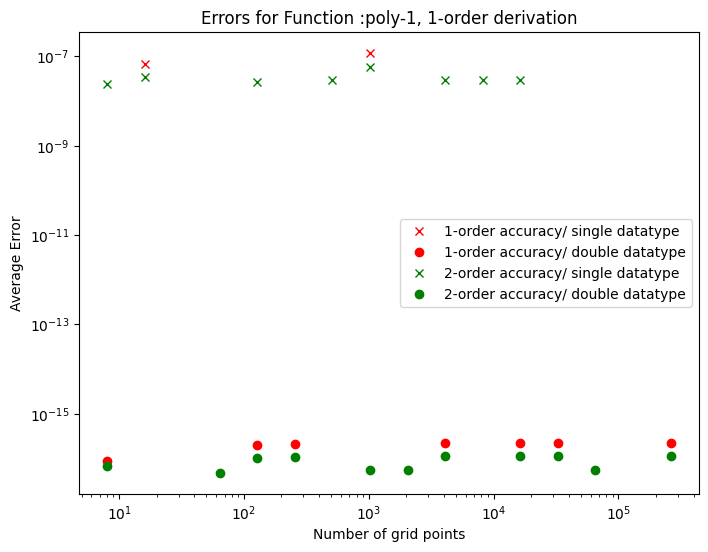

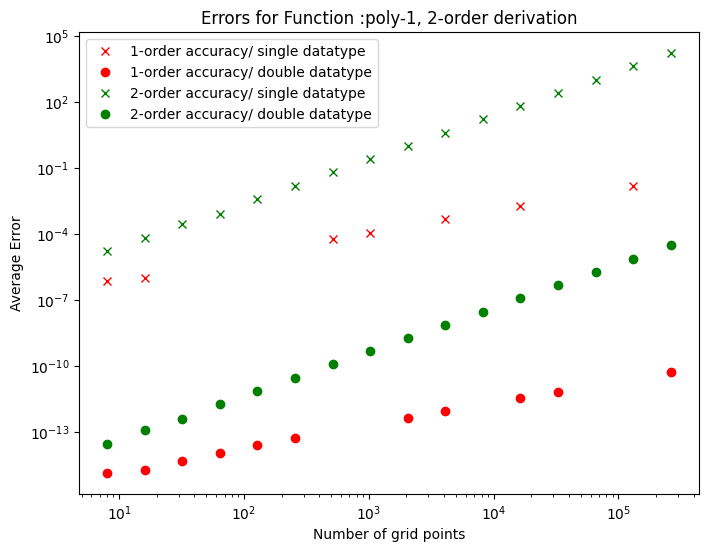

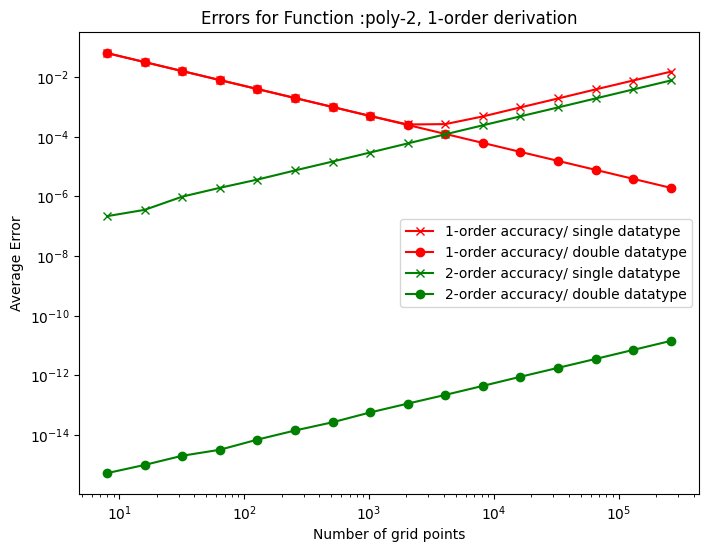

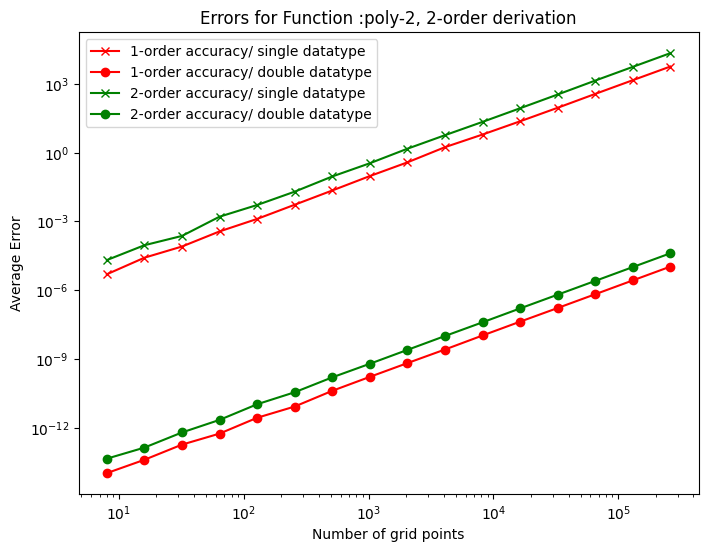

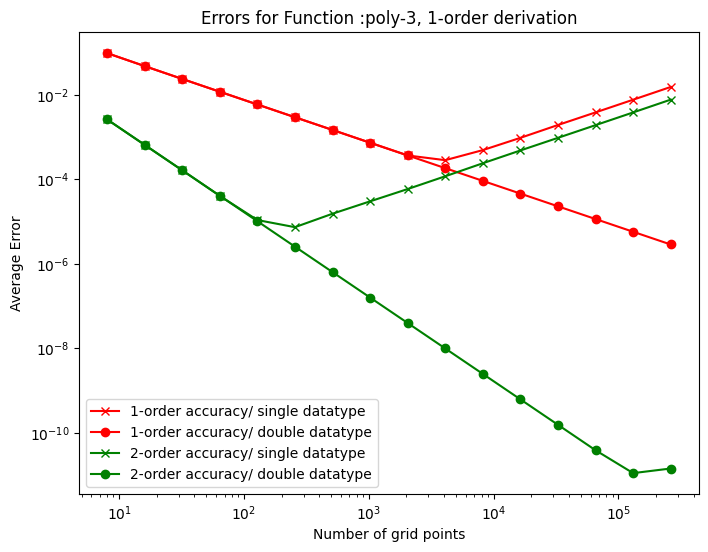

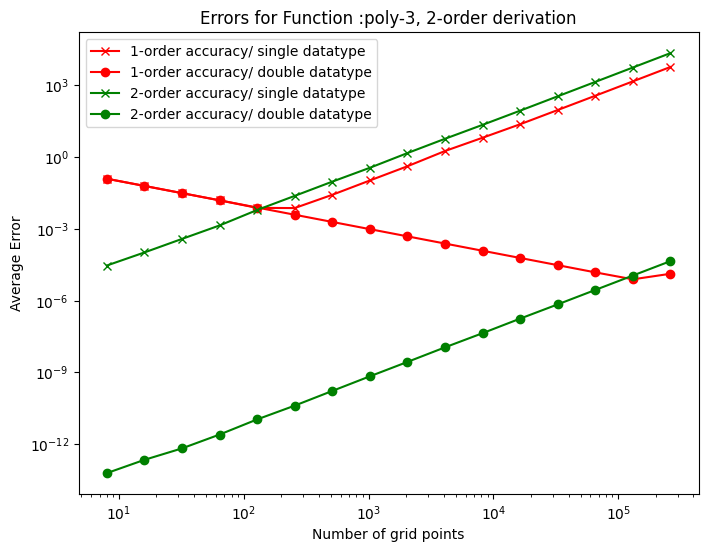

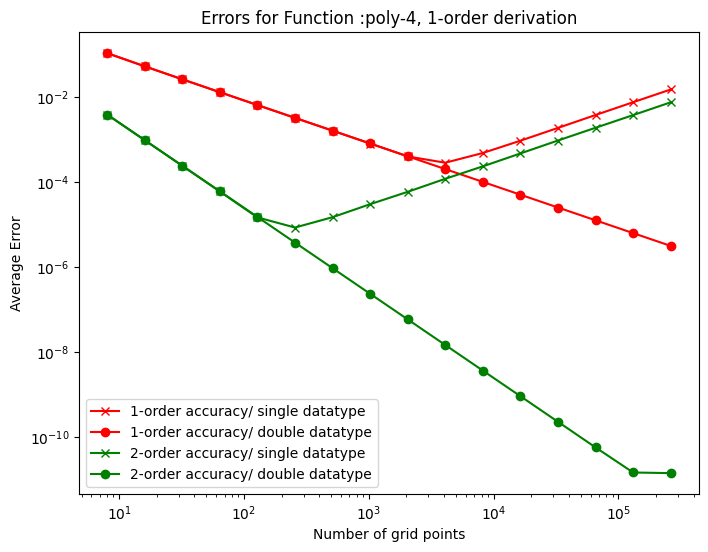

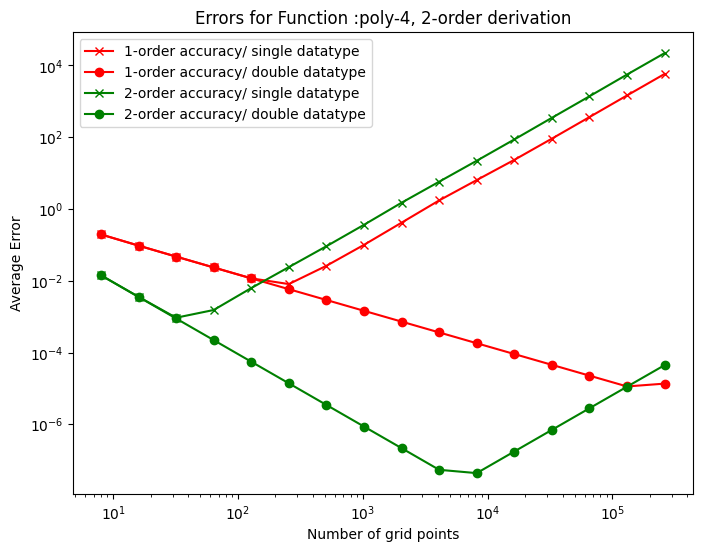

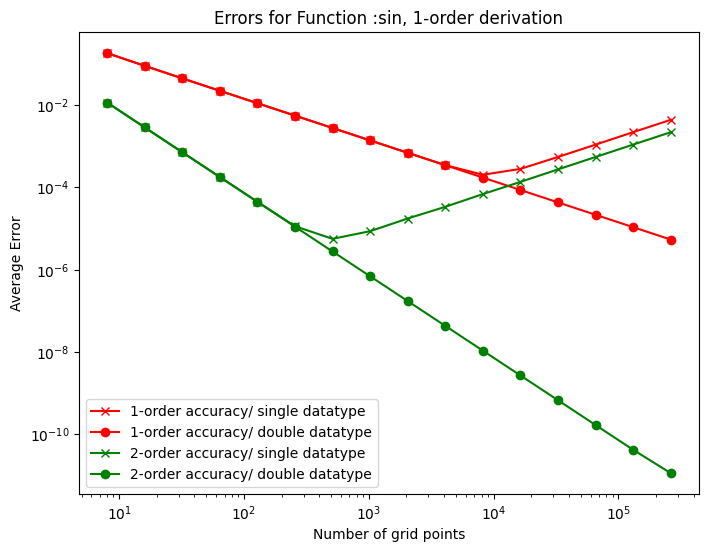

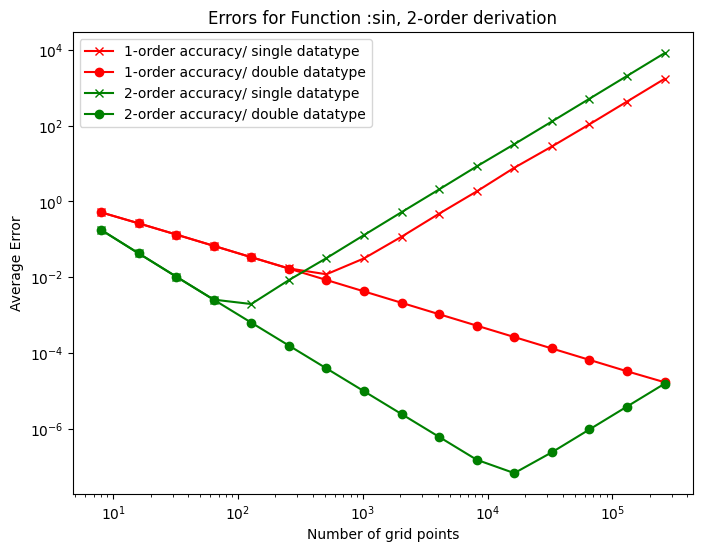

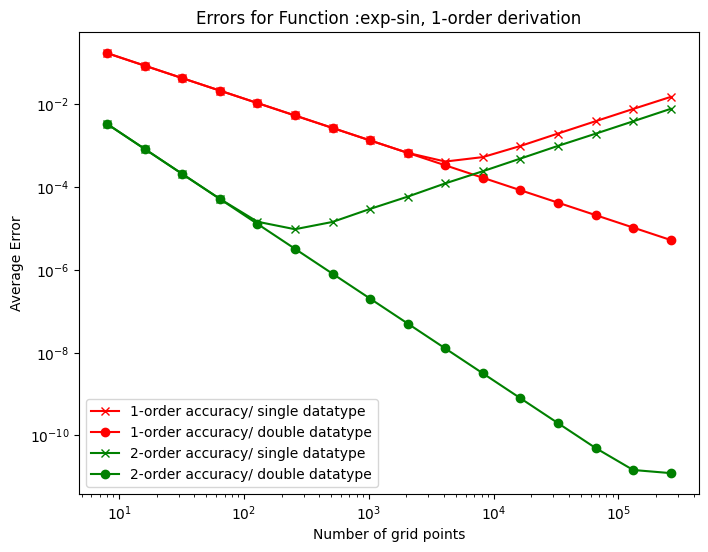

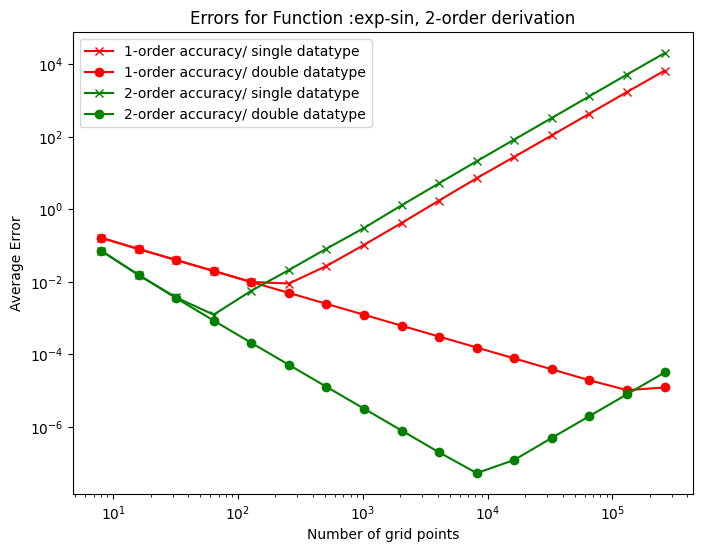

In [10]:
# plotting all the results above
real_grid_num = 2**(np.arange(max_iter)+3)
line_styles_and_markers = ['rx-', 'ro-',
                           'gx-', 'go-', 'k--.', 'kx-', 'y--', 'yx-']
no_line=['rx','ro','gx','go']
counter = 0

for functype in ["poly-1"]:
    for order in [1, 2]:
        fig, ax = plt.subplots(figsize=(8, 6))
        counter = 0
        for precision in [1, 2]:
            for datatype in ["single", "double"]:
                errors = result[(functype, order, precision, datatype)]
                labels = str(precision)+"-order accuracy/ " + \
                    datatype+" datatype"
                ax.loglog(real_grid_num, errors,
                          no_line[counter], label=labels)
                counter += 1
        ax.set_xlabel('Number of grid points')
        ax.set_ylabel('Average Error')
        figtitle='Errors for Function :'+functype +", "+str(order)+"-order derivation"
        ax.set_title(figtitle)
        ax.legend()
        plt.savefig("./HW2_fig/"+functype+str(order)+".png")
        plt.show()

for functype in ["poly-2", "poly-3", "poly-4", "sin", "exp-sin"]:
    for order in [1, 2]:
        fig, ax = plt.subplots(figsize=(8, 6))
        counter = 0
        for precision in [1, 2]:
            for datatype in ["single", "double"]:
                errors = result[(functype, order, precision, datatype)]
                labels = str(precision)+"-order accuracy/ " + \
                    datatype+" datatype"
                ax.loglog(real_grid_num, errors,
                          line_styles_and_markers[counter], label=labels)
                counter += 1
        ax.set_xlabel('Number of grid points')
        ax.set_ylabel('Average Error')
        figtitle='Errors for Function :'+functype +", "+str(order)+"-order derivation"
        ax.set_title(figtitle)
        ax.legend()
        plt.savefig("./HW2_fig/"+functype+str(order)+".png")
        plt.show()